# Description des colonnes (Explication par : Gemini 2.0 Flash)

**Identifiants et références croisées :**

*   **Catalog:** Désignation de l'étoile dans un catalogue stellaire spécifique.
*   **HIP:** Numéro de catalogue Hipparcos (identifiant unique pour chaque étoile du catalogue Hipparcos).
*   **Proxy:** Indique une possible entrée en double dans le catalogue.
*   **HD, BD, CoD, CPD:** Références croisées à d'autres catalogues d'étoiles (Henry Draper, Bonner Durchmusterung, Cordoba Durchmusterung, Cape Photographic Durchmusterung).
*   **CCDM:** Identifiant du Catalogue des composantes d'étoiles doubles et multiples.
*   **Nsys:** Nombre de systèmes dont cette étoile fait partie.
*   **Ncomp:** Nombre de composantes dans le système.

**Données astrométriques :**

*   **RAhms, DEdms:** Ascension droite et déclinaison en heures, minutes, secondes et degrés, minutes d'arc, secondes d'arc.
*   **RAdeg, DEdeg:** Ascension droite et déclinaison en degrés décimaux.
*   **Plx:** Parallaxe (en millièmes de seconde d'arc), une mesure de la distance de l'étoile.
*   **pmRA, pmDE:** Mouvement propre en ascension droite et déclinaison (mas/an), indiquant le mouvement de l'étoile dans le ciel.
*   **e\_RAdeg, e\_DEdeg, e\_Plx, e\_pmRA, e\_pmDE:** Erreurs standard pour RA, Dec, Parallaxe et mouvements propres.
*   **DE:RA, Plx:RA, Plx:DE, pmRA:RA, pmRA:DE, pmRA:Plx, pmDE:RA, pmDE:DE, pmDE:Plx, pmDE:pmRA:** Coefficients de corrélation entre les paramètres astrométriques.
*   **AstroRef:** Référence pour les données astrométriques.

**Données photométriques (Luminosité/Magnitude) :**

*   **Vmag:** Magnitude visuelle (luminosité dans le spectre visible).
*   **BTmag, VTmag:** Magnitudes B et V du catalogue Tycho.
*   **Hpmag:** Magnitude Hipparcos (luminosité mesurée par le satellite Hipparcos).
*   **B-V, V-I:** Indices de couleur (différences de magnitude entre différents filtres, liées à la température de l'étoile).
*   **e\_BTmag, e\_VTmag, e\_Hpmag, e\_B-V, e\_V-I:** Erreurs standard pour les magnitudes et les indices de couleur.
*   **r\_Vmag, r\_B-V, r\_V-I:** Indicateurs signalant la fiabilité/qualité des mesures de magnitude et d'indice de couleur.
*   **CombMag:** Magnitude combinée.

**Informations sur la variabilité :**

*   **VarFlag:** Indicateur signalant la variabilité de la luminosité de l'étoile.
*   **Hpscat:** Dispersion de la magnitude Hipparcos.
*   **o\_Hpmag:** Nombre d'observations pour Hpmag.
*   **Hpmax, HPmin:** Magnitude Hipparcos maximale et minimale.
*   **Period:** Période de variabilité (si l'étoile est variable).
*   **HvarType:** Type de variabilité (par exemple, Céphéide, Binaire à éclipses).
*   **moreVar, morePhoto:** Indicateurs signalant des données de variabilité ou photométriques supplémentaires.

**Autres indicateurs et informations :**

*   **MultFlag:** Indicateur signalant si l'étoile est un système d'étoiles multiples.
*   **Source:** Source des données.
*   **Qual:** Indicateur de qualité pour les données.
*   **m\_HIP, m\_BTmag, m\_Hpmag:** Indicateurs signalant la source des données.
*   **theta, rho, e\_rho:** Angle de position et séparation pour les étoiles doubles/multiples.
*   **dHp, e\_dHp:** Différence entre Hpmag et la magnitude prédite.
*   **Survey, Chart, Notes:** Références à des relevés, cartes et notes.
*   **SpType:** Type spectral (classification de l'étoile basée sur son spectre).
*   **(V-I)red:** Indice de couleur sans rougissement.
*   **r\_SpType:** Indicateur signalant la fiabilité/qualité du type spectral.
*   **F1, F2, ---:** Colonnes inconnues.


In [77]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [78]:
import pandas as pd

data = pd.read_csv('hipparcos-voidmain.csv')

data.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


In [79]:
[e for e in data.columns if e.startswith('o_')]

['o_Hpmag']

## Nettoyage et Exploration des données

### Identifier et gérer les valeurs manquantes. Explorer plusieurs statégies

In [80]:
print(data.shape)
# Supprimer les colonnes non pertinentes
columns_to_drop = ['o_Hpmag', 'm_BTmag', 'm_Hpmag', 'm_HIP', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'e_BTmag', 'e_VTmag', 'e_B-V', 'e_V-I', 'e_Hpmag', 'Catalog', 'HIP', 'HD', 'BD', 'CoD', 'CPD', 'CCDM', 'Proxy', 'RAhms', 'DEdms', 'Notes', 'Survey', 'Chart', 'F1', 'F2', '---', 'AstroRef', 'Source', 'r_Vmag', 'r_B-V', 'r_V-I', 'r_SpType']  # Ajoute d'autres colonnes à supprimer ici
data = data.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' pour ne pas planter si une colonne n'existe pas
data.head()
print(data.shape)

(118218, 78)
(118218, 42)


In [81]:
print(data.shape)
pourcent = (data.isna().sum() / len(data))*100  # Pourcentage de valeurs manquantes par colonne

# Séléctionner les colonnes contenant plus de 50% de valeurs manquantes
# Ces colonnes seront supprimées du dataframe
colonnesAEnlever = pourcent[pourcent.values > 30].keys()

data = data.drop(columns=colonnesAEnlever)
print(data.shape)

(118218, 42)
(118218, 27)


In [82]:
data['SpType'].value_counts()

SpType
K0           8570
G5           6017
A0           4944
F8           4369
G0           4238
             ... 
M3Ia0           1
F3IIIp...       1
G1IB            1
G0w             1
A3Ia comp       1
Name: count, Length: 4124, dtype: int64

In [83]:
# au vu du grand nombre de sptype différents, on ne garde que la première lettre.
data['SpType'] = data['SpType'].apply(lambda x: x[0] if pd.notnull(x) and len(x) > 0 else x)
data['SpType'].value_counts()

SpType
K    32036
F    25607
G    22771
A    18704
B    10421
M     4862
O      265
C      165
R       89
W       75
s       69
N       63
D       27
S       25
p        3
k        1
(        1
Name: count, dtype: int64

In [84]:
# Remplir les valeurs manquantes dans les colonnes numériques avec la moyenne de chaque colonne
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

data.dropna(subset=['SpType'], inplace=True)
data.isna().sum()

Vmag         0
RAdeg        0
DEdeg        0
Plx          0
pmRA         0
pmDE         0
DE:RA        0
Plx:RA       0
Plx:DE       0
pmRA:RA      0
pmRA:DE      0
pmRA:Plx     0
pmDE:RA      0
pmDE:DE      0
pmDE:Plx     0
pmDE:pmRA    0
BTmag        0
VTmag        0
B-V          0
V-I          0
Hpmag        0
Hpscat       0
Hpmax        0
HPmin        0
Ncomp        0
(V-I)red     0
SpType       0
dtype: int64

## Colonnes restantes après nettoyage

Légende : <span style="display:inline-block;padding:2px 8px;margin-right:8px;border-radius:4px;background:#1f77b4;color:white">Numérique</span><span style="display:inline-block;padding:2px 8px;border-radius:4px;background:#9467bd;color:white">Type spectral</span>

<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">Vmag</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">RAdeg</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">DEdeg</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">Plx</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">pmRA</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">pmDE</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">DE:RA</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">Plx:RA</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">Plx:DE</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">pmRA:RA</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">pmRA:DE</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">pmRA:Plx</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">pmDE:RA</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">pmDE:DE</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">pmDE:Plx</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">pmDE:pmRA</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">BTmag</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">VTmag</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">B-V</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">V-I</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">Hpmag</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">Hpscat</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">Hpmax</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">HPmin</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">Ncomp</span>,
<span style="background:#1f77b4;color:white;padding:2px 6px;border-radius:4px">(V-I)red</span>,
<span style="background:#9467bd;color:white;padding:2px 6px;border-radius:4px">SpType</span>,


### Rechercher et traiter les valeurs aberrantes (outliers) dans certaines colonnes (par exemple, en utilisant des boxplots ou des méthodes statistiques).

In [85]:
data.select_dtypes(include=["number"]).describe()

,Vmag,RAdeg,DEdeg,Plx,pmRA,pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,...,BTmag,VTmag,B-V,V-I,Hpmag,Hpscat,Hpmax,HPmin,Ncomp,(V-I)red
count,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,...,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000
mean,8.311284,181.652596,-2.096376,7.093222,-1.389287,-16.006394,0.002895,0.003344,-0.087301,0.009035,...,9.138753,8.341448,0.702655,0.758345,8.414627,0.023397,8.373840,8.453167,1.097368,0.754239
std,1.262852,103.204560,40.990343,11.053601,96.190202,91.194513,0.211196,0.202258,0.155967,0.209510,...,1.358993,1.192394,0.489156,0.562248,1.271257,0.062949,1.251787,1.286843,0.300574,0.583411
min,-1.440000,0.000912,-89.782454,-35.100000,-4410.790000,-5813.000000,-0.980000,-0.970000,-0.780000,-0.990000,...,-0.417000,-0.608000,-0.400000,-0.420000,-1.087600,0.000000,-1.170000,-0.980000,1.000000,-0.520000
25%,7.620000,93.728186,-36.633091,2.510000,-14.940000,-21.300000,-0.140000,-0.130000,-0.190000,-0.120000,...,8.365750,7.701000,0.343000,0.400000,7.718800,0.012000,7.690000,7.750000,1.000000,0.400000
50%,8.410000,182.029846,-1.810557,4.580000,-1.680000,-5.620000,0.000000,0.000000,-0.090000,0.010000,...,9.238000,8.444000,0.609000,0.680000,8.518000,0.016000,8.480000,8.540000,1.000000,0.680000
75%,9.090000,271.918291,31.424920,8.250000,11.560000,3.720000,0.140000,0.140000,0.020000,0.150000,...,10.075000,9.116000,1.074000,1.040000,9.198900,0.021000,9.150000,9.230000,1.000000,1.040000
max,13.780000,359.978792,89.569409,772.330000,6767.260000,10326.930000,0.960000,0.990000,0.840000,0.900000,...,14.297000,12.058000,5.460000,9.030000,13.902600,1.976000,13.900000,15.090000,4.000000,9.290000


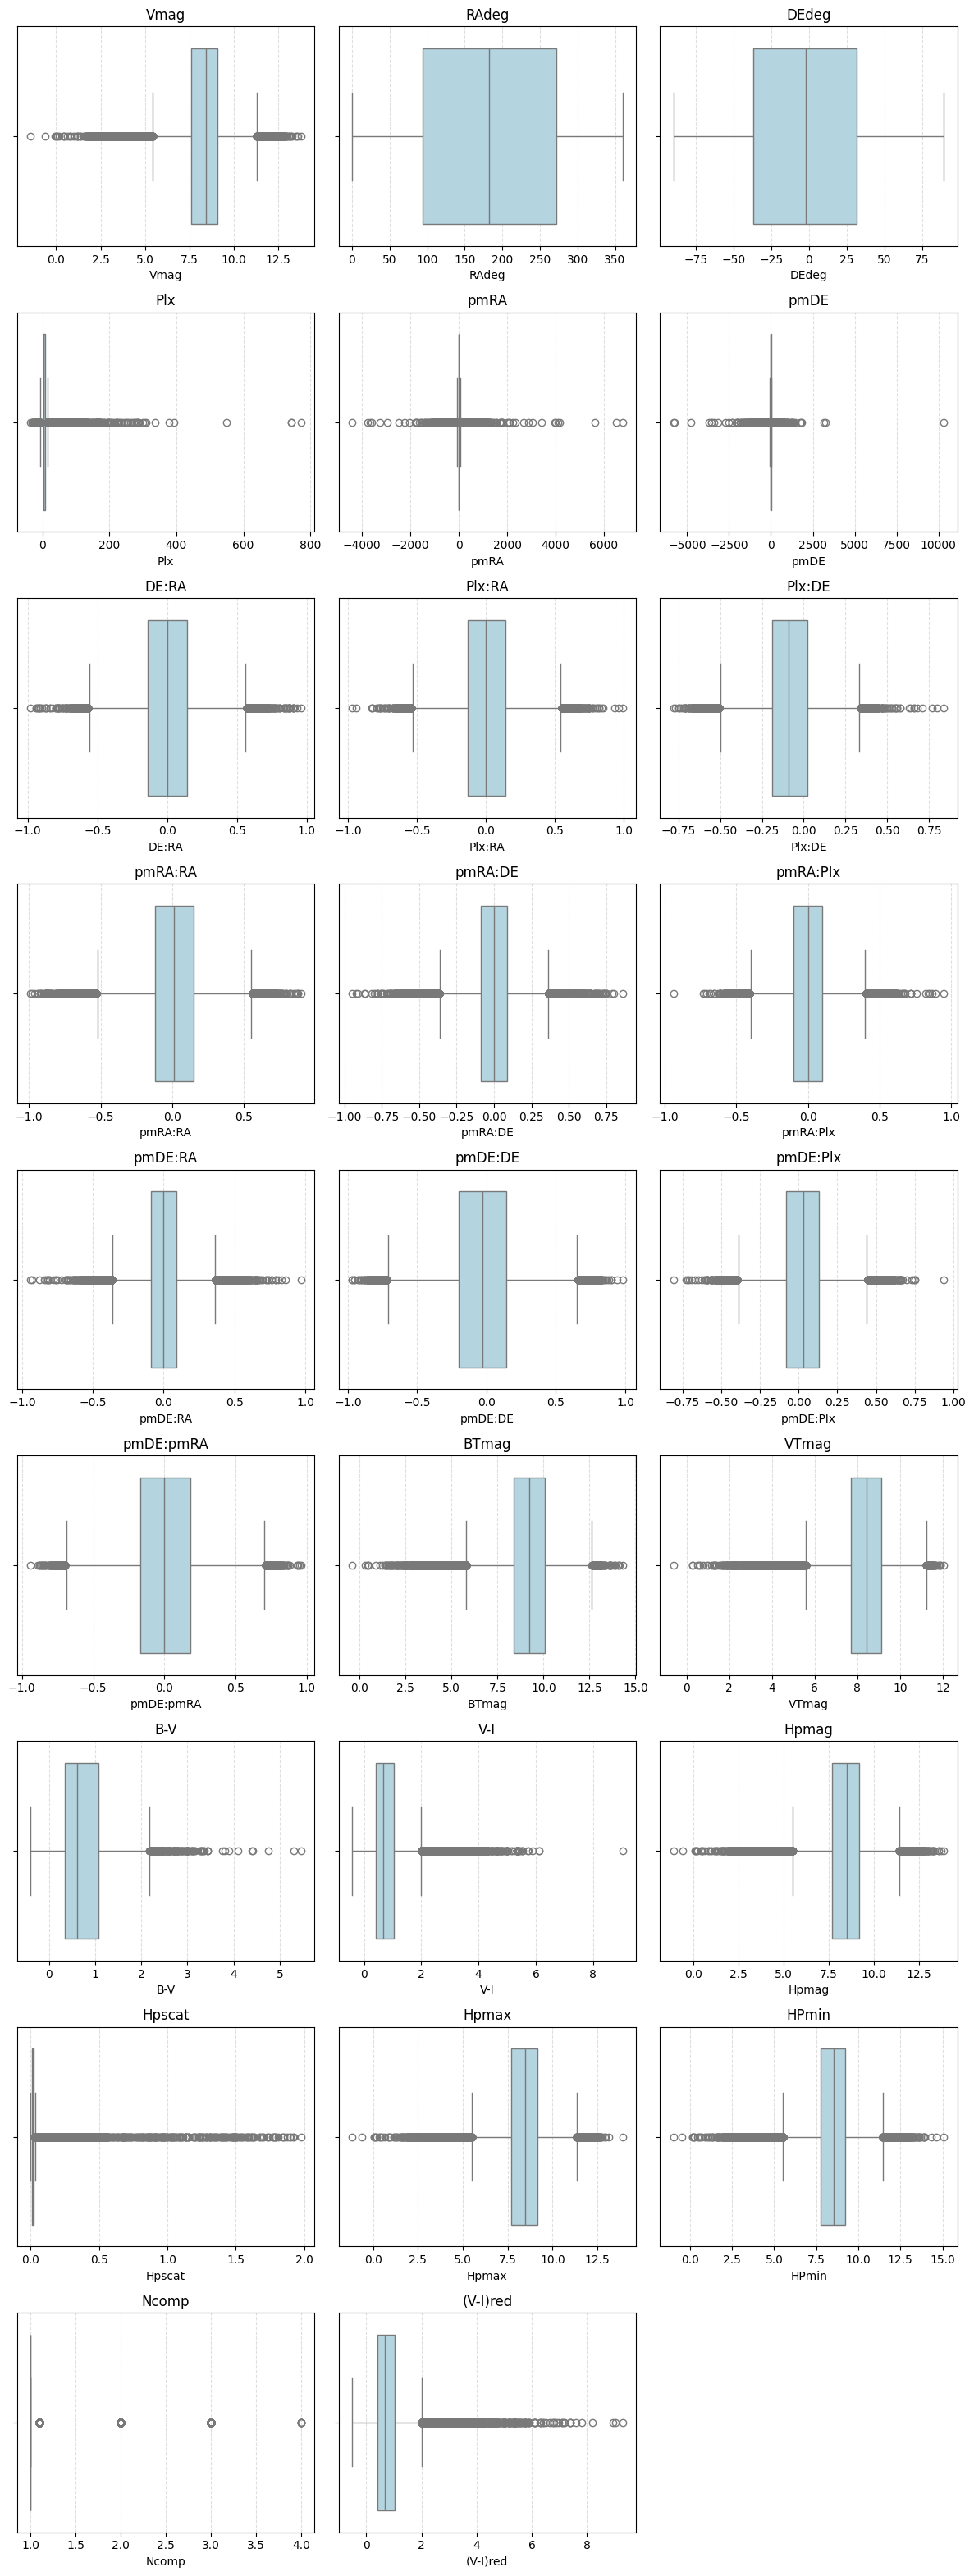

In [86]:
cols_to_plot = [elt for elt in data.select_dtypes(include=['number']).columns]

n = len(cols_to_plot)
ncols = 3
nrows = math.ceil(n / ncols)

plt.figure(figsize=(4 * ncols, 3.5 * nrows))
for i, col in enumerate(cols_to_plot, 1):
    ax = plt.subplot(nrows, ncols, i)
    sns.boxplot(x=data[col], whis=1.5, color='lightblue', orient='h')
    ax.set_title(col)
    ax.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

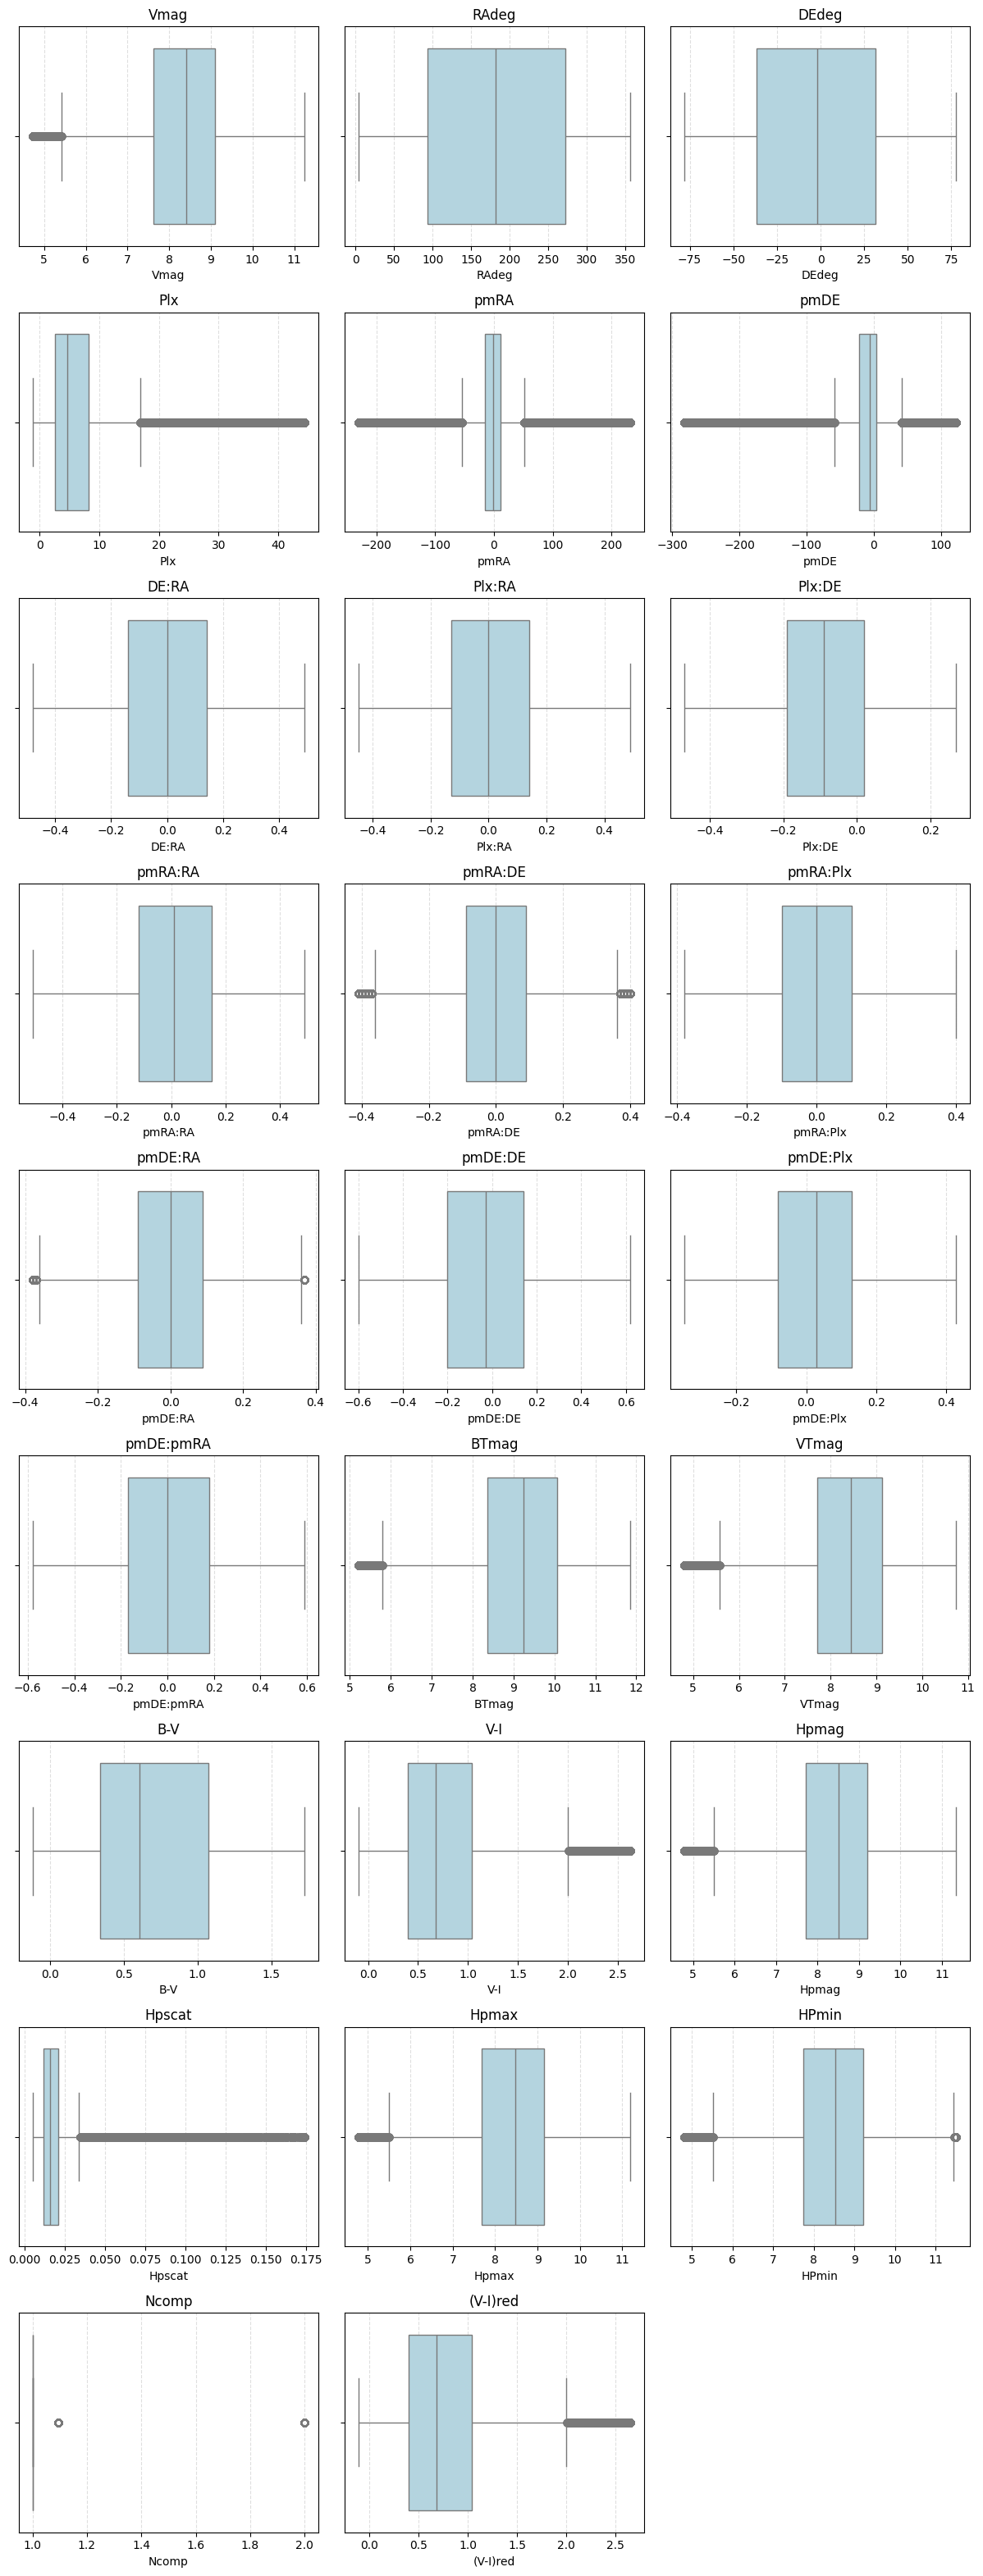

In [87]:
cols_to_plot = [elt for elt in data.columns if elt != 'SpType']

numeric_cols = data.select_dtypes(include=["number"]).columns

for col in numeric_cols:
    q_low, q_high = data[col].quantile([0.01, 0.99])
    data[col] = data[col].clip(lower=q_low, upper=q_high)

n = len(cols_to_plot)
ncols = 3
nrows = math.ceil(n / ncols)

plt.figure(figsize=(4 * ncols, 3.5 * nrows))
for i, col in enumerate(cols_to_plot, 1):
    ax = plt.subplot(nrows, ncols, i)
    sns.boxplot(x=data[col], whis=1.5, color='lightblue', orient='h')
    ax.set_title(col)
    ax.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [88]:
data.select_dtypes(include=["number"]).describe()

,Vmag,RAdeg,DEdeg,Plx,pmRA,pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,...,BTmag,VTmag,B-V,V-I,Hpmag,Hpscat,Hpmax,HPmin,Ncomp,(V-I)red
count,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,...,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000,115184.000000
mean,8.314742,181.652034,-2.099168,6.790518,-1.643482,-14.855697,0.002882,0.003355,-0.087181,0.009108,...,9.144135,8.347762,0.700418,0.752534,8.418165,0.020321,8.377822,8.456193,1.096144,0.745496
std,1.216597,103.139189,40.835620,7.371214,55.028676,50.575857,0.207462,0.199010,0.152837,0.205178,...,1.318971,1.155690,0.480351,0.531890,1.225326,0.021279,1.206756,1.239018,0.294627,0.534508
min,4.720000,3.706975,-78.263575,-1.230000,-231.031700,-282.605500,-0.480000,-0.450000,-0.470000,-0.510000,...,5.206000,4.800830,-0.117000,-0.100000,4.781149,0.005000,4.770000,4.810000,1.000000,-0.110000
25%,7.620000,93.728186,-36.633091,2.510000,-14.940000,-21.300000,-0.140000,-0.130000,-0.190000,-0.120000,...,8.365750,7.701000,0.343000,0.400000,7.718800,0.012000,7.690000,7.750000,1.000000,0.400000
50%,8.410000,182.029846,-1.810557,4.580000,-1.680000,-5.620000,0.000000,0.000000,-0.090000,0.010000,...,9.238000,8.444000,0.609000,0.680000,8.518000,0.016000,8.480000,8.540000,1.000000,0.680000
75%,9.090000,271.918291,31.424920,8.250000,11.560000,3.720000,0.140000,0.140000,0.020000,0.150000,...,10.075000,9.116000,1.074000,1.040000,9.198900,0.021000,9.150000,9.230000,1.000000,1.040000
max,11.250000,356.197382,77.804855,44.430000,232.462300,122.921700,0.490000,0.490000,0.270000,0.490000,...,11.856000,10.743000,1.725000,2.630000,11.345553,0.174000,11.190000,11.510000,2.000000,2.650000


### Convertir les types de données si nécessaire (par exemple, s'assurer que les colonnes d'identifiants sont bien des chaînes de caractères).


## Analyse descriptive :

### Calculer des statistiques descriptives pour différentes colonnes (moyenne, médiane, écart-type, minimum, maximum, quartiles) sur l'ensemble des données ou des sous-ensembles de colonnes.

### Créer des histogrammes et des diagrammes de dispersion pour visualiser la distribution des données et les relations entre les variables.

### Calculer la matrice de corrélation et l'interpréter. Quelles variables sont fortement corrélées ?

## Visualisation

### Utiliser des bibliothèques comme Matplotlib ou Seaborn pour créer des visualisations plus avancées.

### Représenter la position des étoiles sur une carte du ciel (en utilisant RA et Dec).

### Explorer les relations entre la magnitude, la couleur et la distance des étoiles.

## Feature Engineering

### Créer de nouvelles colonnes à partir des colonnes existantes. Par exemple, calculer la distance des étoiles à partir de la parallaxe (distance = 1 / parallaxe). Attention aux unités !

### Créer des catégories d'étoiles en fonction de leur type spectral ou de leur variabilité.

## Machine Learning

### Prédire le type spectral d'une étoile à partir de ses autres caractéristiques.

### Regrouper les étoiles en clusters en fonction de leurs propriétés (clustering).

### Détecter les étoiles variables.